In [58]:
import pandas as pd
import  numpy as np


In [59]:
df=pd.read_csv("/Users/antoniojaenarias/Desktop/DATA SCIENCE/TODO/ML_KAGGLE_1/data/data.csv")
df

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,0,Thompson,tube,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6
1,1,Thompson,tube,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2
2,2,Thompson,NaN,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5
3,3,Beus,annulus,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0
4,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
...,...,...,...,...,...,...,...,...,...,...
31639,31639,Thompson,NaN,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3
31640,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9
31641,31641,Thompson,NaN,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3
31642,31642,Thompson,tube,6.89,3825.0,NaN,23.6,23.6,1972.0,3.7


In [60]:
train=df[df['x_e_out [-]'].isnull()!=True]
train.reset_index(inplace=True,drop=True)

test=df[df['x_e_out [-]'].isnull()==True]
test.reset_index(inplace=True,drop=True)
test

,id,author,geometry,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2]
0,4,NaN,tube,13.79,686.0,NaN,11.1,11.1,457.0,2.8
1,7,Peskov,tube,18.00,750.0,NaN,10.0,10.0,1650.0,2.2
2,10,Thompson,tube,NaN,NaN,NaN,1.9,1.9,152.0,3.2
3,12,Thompson,NaN,6.89,7500.0,NaN,NaN,12.8,1930.0,4.8
4,23,Beus,annulus,15.51,1355.0,NaN,5.6,15.2,2134.0,2.1
...,...,...,...,...,...,...,...,...,...,...
10410,31633,Thompson,tube,11.03,NaN,NaN,11.5,11.5,NaN,2.0
10411,31634,Richenderfer,plate,1.01,2000.0,NaN,15.0,120.0,10.0,6.2
10412,31637,Weatherhead,tube,13.79,688.0,NaN,NaN,11.1,457.0,2.3
10413,31640,NaN,NaN,13.79,NaN,NaN,4.7,4.7,NaN,3.9


In [61]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols.remove('id')

cat_cols = df.select_dtypes(include=['object']).columns.tolist()

all_features=num_cols + cat_cols

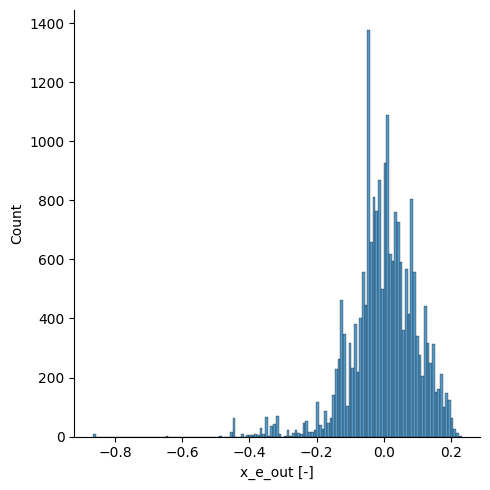

In [62]:
import seaborn as sns

sns.displot(train, x="x_e_out [-]")

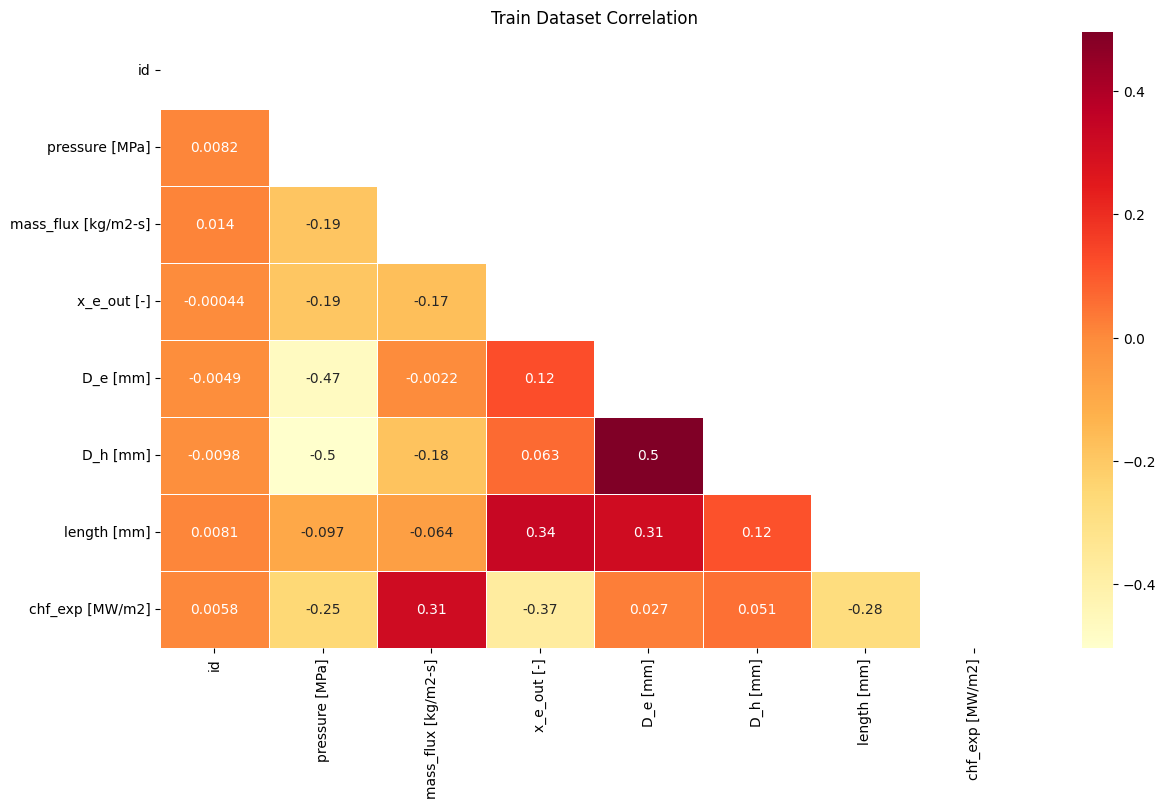

In [63]:
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df: pd.core.frame.DataFrame, title_name: str='Train correlation') -> None:
    corr = df.corr()
    fig, axes = plt.subplots(figsize=(14, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrRd', annot=True)
    plt.title(title_name)
    plt.show()

# plot_correlation_heatmap(original, 'Original Dataset Correlation')
plot_correlation_heatmap(train, 'Train Dataset Correlation')

In [64]:
train=train[all_features]
train

,pressure [MPa],mass_flux [kg/m2-s],x_e_out [-],D_e [mm],D_h [mm],length [mm],chf_exp [MW/m2],author,geometry
0,7.00,3770.0,0.1754,NaN,10.8,432.0,3.6,Thompson,tube
1,NaN,6049.0,-0.0416,10.3,10.3,762.0,6.2,Thompson,tube
2,13.79,2034.0,0.0335,7.7,7.7,457.0,2.5,Thompson,NaN
3,13.79,3679.0,-0.0279,5.6,15.2,2134.0,3.0,Beus,annulus
4,17.24,3648.0,-0.0711,NaN,1.9,696.0,3.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
21224,12.07,NaN,-0.0195,NaN,1.9,152.0,5.4,NaN,NaN
21225,NaN,3648.0,-0.0487,4.7,4.7,318.0,9.0,Thompson,tube
21226,NaN,1736.0,0.0886,NaN,7.8,591.0,2.3,Thompson,NaN
21227,18.27,658.0,-0.1224,3.0,3.0,150.0,2.3,Thompson,NaN


In [65]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import re

def preprocess_data(train, cat_cols, num_cols):
    # Copy the original dataframe to avoid modifying the original data
    processed_df = train.copy()
    
    # Handling missing values in numerical variables
    num_imputer = SimpleImputer(strategy='mean')
    processed_df[num_cols] = num_imputer.fit_transform(processed_df[num_cols])
    
    # Handling missing values in categorical variables
    cat_imputer = SimpleImputer(strategy='most_frequent')
    processed_df[cat_cols] = cat_imputer.fit_transform(processed_df[cat_cols])
    
    # Label encoding for categorical variables
    label_encoder = LabelEncoder()
    for col in cat_cols:
        processed_df[col] = label_encoder.fit_transform(processed_df[col].astype(str))
    
    # Preprocess column names
    processed_df.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in processed_df.columns]
    
    return processed_df


In [66]:
processed_df=preprocess_data(train, cat_cols, num_cols)
processed_df

,pressure_MPa_,mass_flux_kg/m2-s_,x_e_out_-_,D_e_mm_,D_h_mm_,length_mm_,chf_exp_MW/m2_,author,geometry
0,7.000000,3770.000000,0.1754,8.589305,10.8,432.0,3.6,7,2
1,10.635066,6049.000000,-0.0416,10.300000,10.3,762.0,6.2,7,2
2,13.790000,2034.000000,0.0335,7.700000,7.7,457.0,2.5,7,2
3,13.790000,3679.000000,-0.0279,5.600000,15.2,2134.0,3.0,0,0
4,17.240000,3648.000000,-0.0711,8.589305,1.9,696.0,3.6,7,2
...,...,...,...,...,...,...,...,...,...
21224,12.070000,3070.487779,-0.0195,8.589305,1.9,152.0,5.4,7,2
21225,10.635066,3648.000000,-0.0487,4.700000,4.7,318.0,9.0,7,2
21226,10.635066,1736.000000,0.0886,8.589305,7.8,591.0,2.3,7,2
21227,18.270000,658.000000,-0.1224,3.000000,3.0,150.0,2.3,7,2


In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

cv_scores=list()
importance_xgb=list()
preds=list()

X=processed_df.drop('x_e_out_-_', axis=1)
y=processed_df["x_e_out_-_"]

y

0        0.1754
1       -0.0416
2        0.0335
3       -0.0279
4       -0.0711
          ...  
21224   -0.0195
21225   -0.0487
21226    0.0886
21227   -0.1224
21228    0.0603
Name: x_e_out_-_, Length: 21229, dtype: float64

In [78]:
from xgboost import XGBRegressor

for i in range(3):
    print(f'\nFold {i+1} CV begins')
    skf = KFold(n_splits=3, random_state=np.random.randint(0,999), shuffle=True)
    
    for train_ix, test_ix in skf.split(X, y):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
                
        XGB_md = XGBRegressor(objective='reg:squarederror',
                              colsample_bytree=0.8, 
                              gamma=0.8, 
                              learning_rate=0.01, 
                              max_depth=5, 
                              min_child_weight=10, 
                              n_estimators=1000, 
                              subsample=0.8).fit(X_train, y_train)
        importance_xgb.append(XGB_md.feature_importances_)
        
        XGB_pred_1 = XGB_md.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, XGB_pred_1))
        cv_scores.append(rmse)
        print(f'Fold {i+1} CV done. RMSE: \033[1;36m{rmse:.5f}\033[0m')

scores = np.mean(cv_scores)    
print(f'\nThe average RMSE over 3-folds (run 3 times) is: \033[1;36m{scores:.5f}\033[0m')




Fold 1 CV begins
Fold 1 CV done. RMSE: 0.08077
Fold 1 CV done. RMSE: 0.08212
Fold 1 CV done. RMSE: 0.08183

Fold 2 CV begins
Fold 2 CV done. RMSE: 0.08397
Fold 2 CV done. RMSE: 0.08151
Fold 2 CV done. RMSE: 0.07887

Fold 3 CV begins
Fold 3 CV done. RMSE: 0.07994
Fold 3 CV done. RMSE: 0.07927
Fold 3 CV done. RMSE: 0.08514

The average RMSE over 3-folds (run 3 times) is: 0.08149


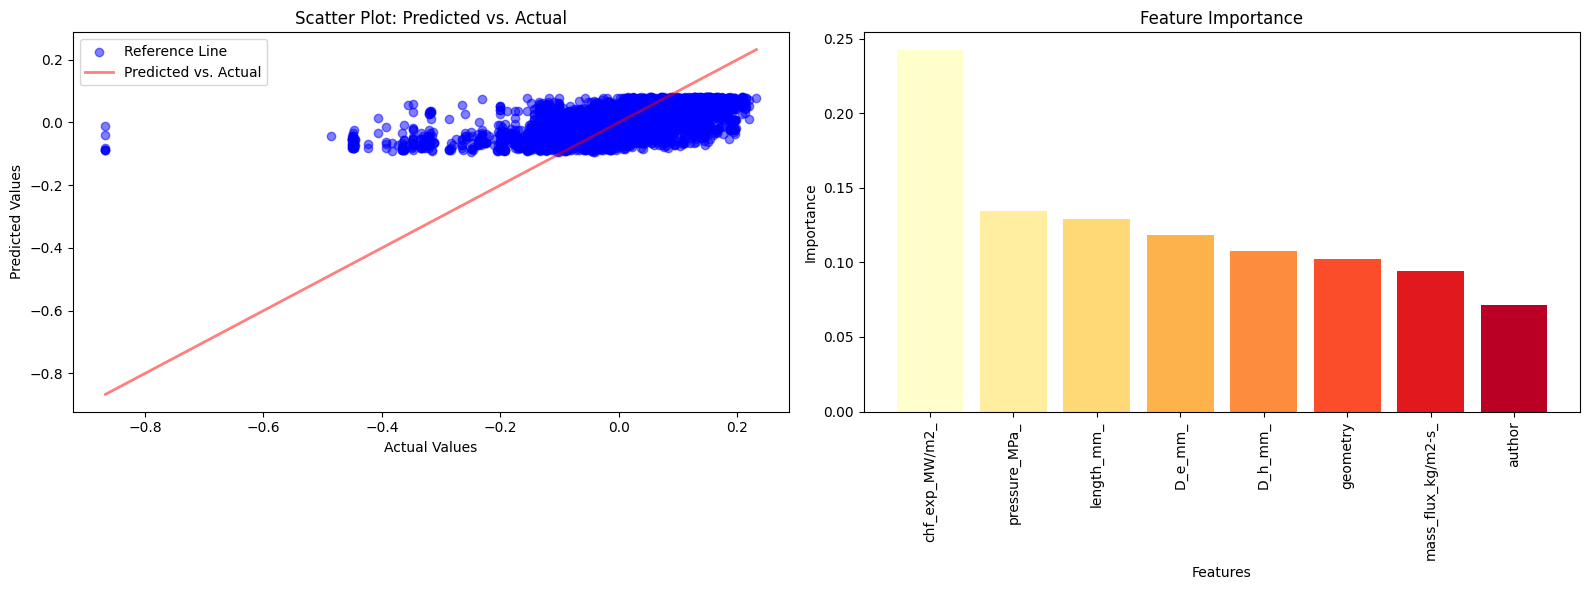

In [79]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Assuming importance_xgb contains the feature importances from the XGB model
# Assuming preds contains the predictions from the XGB model

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of actual values vs predicted values
axes[0].scatter(y_test, XGB_pred_1, color='blue', label='Actual', alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', alpha=0.5, linewidth=2)
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Scatter Plot: Predicted vs. Actual')
axes[0].legend(['Reference Line', 'Predicted vs. Actual'])

# Feature Importance visualization
importance_xgb_avg = np.mean(importance_xgb, axis=0)
sorted_feature_indices = np.argsort(importance_xgb_avg)[::-1]
sorted_feature_names = [X.columns[i] for i in sorted_feature_indices]
sorted_importance = importance_xgb_avg[sorted_feature_indices]

color_map = cm.get_cmap('YlOrRd')
colors = color_map(np.arange(len(sorted_feature_names)) / len(sorted_feature_names))

axes[1].bar(range(len(sorted_feature_names)), sorted_importance, color=colors)
axes[1].set_xticks(range(len(sorted_feature_names)))
axes[1].set_xticklabels(sorted_feature_names, rotation='vertical')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Importance')
axes[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()